To fill the FCC lattice 0 particles were added for a total of 10 particles.
The correlation time is  [7.14663016]


<ipython-input-8-ba0af236a9a6>:51: RuntimeWarning: invalid value encountered in double_scalars
  Xi[i] = (t1-t2)/(t3*t4)


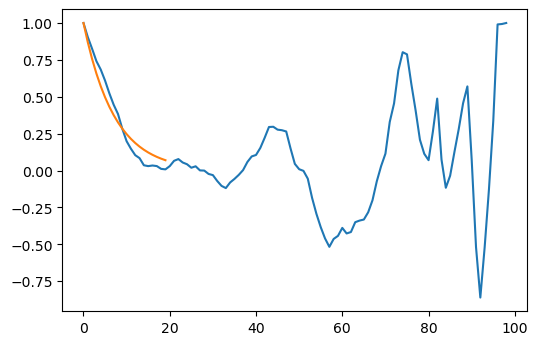

In [8]:
import skeleton_ours
from skeleton_ours import simulate, fcc_lattice, init_velocity, mean_squared_displacement
#from skeleton_ours import 
#from skeleton_ours import 
import itertools
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation
import time
from scipy.optimize import curve_fit

dim = 3
num_tsteps = 4
num_atoms = 10
box_dim = 100
timestep = 0.0004
temp = 10
fill=0
aftert=0

x, num_atoms = fcc_lattice(num_atoms, box_dim, dim, fill)
init_vel, sigma = init_velocity(num_atoms, temp, dim)
init_pos = x
x, v, T, U, r, aftert = simulate(init_pos, init_vel, num_tsteps, timestep, box_dim, num_atoms, dim, temp)

def func(x, b):
    return np.exp(- b * x)


def autocorrelation(data):
    
    '''
    Calculates the autocorrelation function for a given dataset

    Parameters
    ----------
    data : np.ndarray
        The data to be correlated
        
    Returns
    -------
    Xi : array of the autocorrelationfunction(t)
    '''
    Xi=np.zeros(len(data))
    for i in range(len(data)):
        NT = len(data)-i
        t1 = NT*sum(data[0:NT]*data[i:len(data)]) #term 1
        t2 = sum(data[0:NT])*sum(data[i:len(data)]) #term 2
        t3 = np.power(NT*sum(data[0:NT]**2)-sum(data[0:NT])**2, 1/2) #term 3
        t4 = np.power(NT*sum(data[i:len(data)]**2)-sum(data[i:len(data)])**2, 1/2) #term 4
        Xi[i] = (t1-t2)/(t3*t4)
    return Xi

def normal_autocorr(mu, sigma, tau, N):
    """Generates an autocorrelated sequence of Gaussian random numbers.
    
    Each of the random numbers in the sequence of length `N` is distributed
    according to a Gaussian with mean `mu` and standard deviation `sigma` (just
    as in `numpy.random.normal`, with `loc=mu` and `scale=sigma`). Subsequent
    random numbers are correlated such that the autocorrelation function
    is on average `exp(-n/tau)` where `n` is the distance between random
    numbers in the sequence.
    
    This function implements the algorithm described in
    https://www.cmu.edu/biolphys/deserno/pdf/corr_gaussian_random.pdf
    
    Parameters
    ----------
    
    mu: float
        mean of each Gaussian random number
    sigma: float
        standard deviation of each Gaussian random number
    tau: float
        autocorrelation time
    N: int
        number of desired random numbers
    
    Returns:
    --------
    sequence: numpy array
        array of autocorrelated random numbers
    """
    f = np.exp(-1./tau)
    
    sequence = np.zeros(shape=(N,))
    
    sequence[0] = np.random.normal(0, 1)
    for i in range(1, N):
        sequence[i] = f * sequence[i-1] + np.sqrt(1 - f**2) * np.random.normal(0, 1)
    
    return mu + sigma * sequence

testcor=normal_autocorr(0, 0.1, 10, 100)
Xi = autocorrelation(testcor)
plt.plot(np.arange(0,len(Xi)),Xi)

#MSD, AMSD, D, TSD1 = mean_squared_displacement(x, box_dim)
#print(D)

#t = np.arange(0,num_tsteps-1)
#plt.plot(t,AMSD)


#MSD, AMSD, D, TSD1 = mean_squared_displacement(x[aftert:len(x)], box_dim)
#t = np.arange(0,num_tsteps-1-aftert)
#plt.figure(2)
#plt.plot(t,MSD[:,0])

#plt.figure(3)
t=np.arange(0,20)

popt, pcov = curve_fit(func, np.arange(0,20), Xi[0:20], bounds=(0, [10.]))
plt.plot(t, np.exp(-popt[0] * t))
print("The correlation time is ", 1/popt)


In [31]:
print(t)

[2000 2001 2002 ... 3897 3898 3899]


In [17]:
print(Xi[950:1000])

[ 0.13283693  0.14403034  0.1222959   0.10620765  0.05172069 -0.00927931
 -0.00845327  0.01167844 -0.02448966 -0.04442003 -0.11577213 -0.212278
 -0.35457055 -0.42901764 -0.38141192 -0.32249752 -0.3296833  -0.26976328
 -0.16739996 -0.02411358  0.1982766   0.35141325  0.41859364  0.48988555
  0.55766933  0.58028557  0.61825364  0.58058485  0.39744348  0.24710093
  0.10504814 -0.12115341 -0.32877133 -0.44731052 -0.54357162 -0.50712838
 -0.40132299 -0.26754395 -0.23137675 -0.2163551  -0.10568368  0.0045078
  0.46247272  0.76345468  0.23560388 -0.77002711 -0.84571027 -0.98187569
 -1.                 nan]


In [33]:
len(t)

1900